# Python ile Doğrusal Programlama

## Doğrusal Programlama Nedir?
Doğrusal Programlama, basit bir matematiksel optimizasyon yöntemidir. Amaç en iyi(optimal) sonucu elde etmektir. Genellikle kullanım amacı karı maksimize etmek ya da maliyeti minimuma indirmektir. Bir matematiksel programın doğrusal olması için şunlara ihtiyaç vardır:

* Doğrusal bir bir Amaç Fonksiyonu
* Gerçek değişken olan karar değişkenleri
* Doğrusal şekilde ifade edilen kısıtlar

Doğrusallıkla, aşağıdaki formun herhangi bir ifadesi kastedilmektedir.

$α_1$*$x_1$+$α_2$*$x_2$+$α_3$*$x_3$+...+$α_n$*$x_n$ (=, ≥ , ≤) $b$

$x_i$ burada hesaplamak istediğimiz değişkendir

Bu notebookta iki doğrusal programlama örneği çözülecektir. İlk örnek 2 değişkenli basit bir örnektir, Python'da PuLP kitaplığı kullanılarak hesaplama yöntemlerinin yanı sıra grafik yöntemiyle de kolayca çözülebilir. İkincisi, grafik temsili olmayan daha karmaşık bir örnektir. Örneklerle başlayalım.

# Maksimizasyon Problemi

Biblo ve bahçe heykelleri üreten bir firma, hammadde olarak alçı kullanmaktadır. Şirket, gelirini en üst düzeye çıkarmak için bu iki ürünü ile ilgili planlama istiyor. Mevcut iş gücü günde 40 saat ve mevcut alçı kapasitesi günlük 120 kg'dır. Bibloların satış fiyatı 40 dolar, heykelin satış fiyatı ise 50 dolardır. Aşağıda, üretilen ürün başına kaynakların kullanımı gösteren tablo yer almaktadır. 

| Urun | Is Gucu (saat/urun) | Alci (kg/urun) |
| --- | --- | --- |
| Biblo | 1 | 4 |
| Heykel | 2 | 3 |

Öncelikle problemi doğrusal olarak ifade etmeliyiz.

Değişkenler:

$x_1$ : biblo sayısı

$x_2$ : heykel sayısı

Amac fonksiyonu:

$max(z) = 40x_1 + 50x_2$

Kısıtlar:

$x_1 + 2x_2 <= 40$     (is gucu kısıtı)

$4x_1 + 3x_2 <= 120$    (alci kisiti)
 
$x_1, x_2 >= 0$        (negatif olmama kısıtı)

## 1. Grafik Yöntemle Çözüm

In [2]:
from pulp import *
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

İlk önce iki doğrunun kesişimini bulmak için lineer denklemi çözmemiz gerekiyor.

In [3]:
a = np.array([[2,1], [3,4]])
b = np.array([40,120])
x = np.linalg.solve(a, b)
print ('koordinatlarımız:', (round(x[0]), round(x[1])))

koordinatlarımız: (8.0, 24.0)


Şimdi doğrularımızı, kartezyen koordinat sisteminde çizmeliyiz.

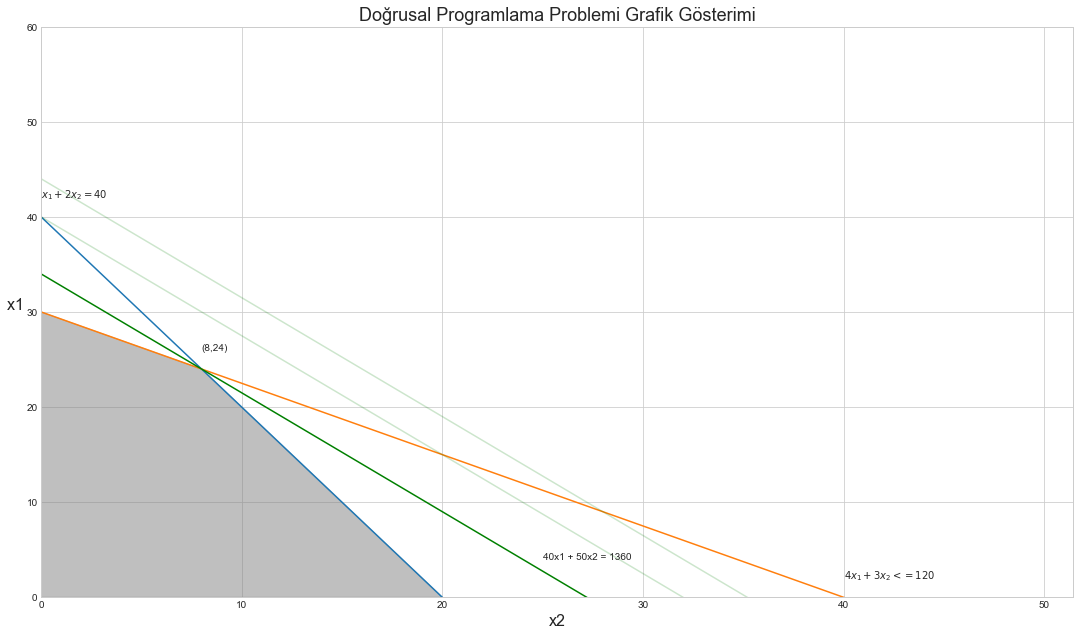

In [4]:
# x ekseni değerleri için bir aralık ayarlayın
x = np.arange(0,50)

# çizilecek doğrular
y1 = -2*x + 40
y2 = -(3.0/4)*x + 30
y3 = -(50.0/40)*x + 34
y4 = -(50.0/40)*x + 40
y5 = -(50.0/40)*x + 44

# Negatif y değerlerinin grafikte gösterilmemesi için y sınırını ayarlıyoruz
plt.ylim(0, 60)

# Doğruların çizilmesi
plt.plot(x, y1, 
         x, y2)
plt.plot(x, y3, 'g')
plt.plot(x, y4, 'g', alpha=0.2)
plt.plot(x, y5, 'g', alpha=0.2)

# Açıklamalar
plt.text(0, 42, r'$x_1 + 2x_2 = 40$')
plt.text(40, 2, r'$4x_1 + 3x_2 <= 120$')
plt.text(8, 26, r'(8,24)')
plt.text(25, 4, r'40x1 + 50x2 = 1360')

# Uygun Çözüm Bölgesini oluşturma
x1 = [0,0,8,20]
x2 = [0,30,24,0]
plt.fill(x1, x2, color = 'grey', alpha=0.5)
plt.xlabel('x2', fontsize=16)
plt.ylabel('x1   ', fontsize=16, rotation=0)
plt.title('Doğrusal Programlama Problemi Grafik Gösterimi', fontsize=18)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()


Taralı alan uygun çözüm bölgesidir. Hangi değişkenlerin amaç fonksiyonunu maksimize ettiğini ve elde edebileceğimiz maksimum kazancın ne olduğunu bulmak için, kara doğrusuna farklı değerler vereceğiz ve taralı alanla nereye temas ettiğini gözlemleyeceğiz. Yukarıdaki grafikte amaç fonksiyonunu maksimize eden değişkenler:

$x_1$ = 24

$x_2$ = 8

ve gelir 1360$

## PuLP ile Doğrusal Programlama

Pulp kitaplığı problem('prob') sınıfını oluşturduktan sonra tüm problem parametrelerinin bu sınıfa eklenmesi şeklinde çalışmaktadır.

In [5]:
# Problemdeki verilerini barındıracak 'prob' değişkenini oluşturmaAmaç fonksiyonu 'prob'a eklenir.
prob = LpProblem("Firma",LpMaximize)

### Değişkenleri Oluşturma
x1 ve x2 değişkenlerini, PuLP kitaplığından LpVariable ile gerçekleştiriyoruz.

In [6]:
# 2 değişken; Heykel sayısı ve biblo sayısı, sıfır alt sınırı ile oluşturulur, 
# üst sınır yoktur ve her ikisi de tam sayıdır.
x1=LpVariable("biblo",0,None,LpInteger)
x2=LpVariable("heykel",0,None,LpInteger)

### Amaç Fonksiyonu

In [7]:
# Amaç fonksiyonu 'prob'a eklenir.
prob += 40*x1 + 50*x2, "Toplam Kar"

### Kısıtlar

In [8]:
# Kısıtlar 'prob'a eklenir.
prob += x1 + 2*x2 <= 40, "is gucu"
prob += 4*x1 + 3*x2 <= 120, "alci"

In [9]:
prob

Firma:
MAXIMIZE
40*biblo + 50*heykel + 0
SUBJECT TO
is_gucu: biblo + 2 heykel <= 40

alci: 4 biblo + 3 heykel <= 120

VARIABLES
0 <= biblo Integer
0 <= heykel Integer

In [10]:
# Problem, PuLP'un Çözücü seçimi kullanılarak çözülür.
prob.solve()
# Çözümün optimalliği kontrol edilir.
print("Cozum optimal mi? :", LpStatus[prob.status])
# Her bir değişkenin optimum değerine bakılır.
for v in prob.variables():
    print(v.name, ":", v.varValue)
# Amaç fonksiyonunun optimum değerine bakılır. 
print("Toplam Kar : ", value(prob.objective))

Cozum optimal mi? : Optimal
biblo : 24.0
heykel : 8.0
Toplam Kar :  1360.0


Gördüğümüz üzere hem grafik yöntem hem de PuLP aynı sonucu verdi. 
Toplam gelir 1360$, 
heykel sayısı 8 ve biblo sayısı 24. 
Ancak, hesaplama yönteminin, grafik yöntemden çok daha hızlı olduğu söylenebilir. 
Grafik yöntemin imkansız olduğu başka bir örnekle devam edelim.

# Minimizasyon Problemi

Bir hastanenin beslenme ve diyet bölümü, hastalar için ayın her günü 30 öğün yemek hazırlıyor. Bir öğün makarna, tavuk, patates, ıspanak ve elmalı turtadan oluşur. Ayrıca, her öğün 63.000 mg protein, 10 mg demir, 15 mg niasin, 1 mg tiamin ve 50 mg C Vitamini içermelidir. Aşağıdaki tablo, her öğün bileşeninin mg/100g cinsinden besin ve yağın kıvamı hakkında bilgi vermektedir.

| Yemek | Protein | Demir | Niasin | Tiamin | C Vit | Yag |
| --- | --- | --- | | --- | --- | --- |
| Makarna | 5 | 1.1 | 1.4 | 0.18 | 0 | 5 |
| Tavuk | 29 | 1.8 | 5.4 | 0.06 | 0 | 5 |
| Patates | 5,3 | 0.5 | 0.9 | 0.06 | 10 | 7.9 |
| Ispanak | 3 | 2.2 | 0.5 | 0.07 | 28 | 300 |
| Elmalı Turta | 4 | 1.2 | 0.6 | 0.15 | 3 | 14.3 |

Her öğünde aynı malzemeleri vermemek için en fazla 300 gr makarna, 300 gr tavuk, 200 gr patates, 100 gr ıspanak ve 100 gr elmalı turta bulunmalıdır. Beslenme gereksinimlerini karşılamak ve minimum yağ oranını sağlamak için bileşenlerin karışımı ne olmalıdır?

Matematiksel olarak problemi ifade edelim.

Değişkenler:

$x_1$ : makarna gramı

$x_2$ : tavuk gramı

$x_3$ : patates gramı

$x_4$ : ıspanak gramı

$x_5$ : elmalı turta gramı

Amac Fonksiyonu:

$min(z) = 5,000x_1 + 5,000x_2 + 7,900x_3 + 300x_4 + 14,300x_5$

Kısıtlar:

$5,000x_1 + 29,000x_2 + 5,300x_3 + 3,000x_4 + 4,000x_5 >= 63,000$ (protein kısıtı)

$1.1x_1 + 1.8x_2 + 0.5x_3 + 2.2x_4 + 1.2x_5 >= 10$ (demir kısıtı)

$1.4x_1 + 5.4x_2 + 0.9x_3 + 0.5x_4 + 0.6x_5 >= 15$ (niasin kısıtı)

$0.18x_1 + 0.06x_2 + 0.06x_3 + 0.07x_4 + 0.15x_5 >= 1$ (tiamin kısıtı)

$10x_3 + 28x_4 + 3x_5 >= 50$ (c vit kısıtı)

$x_1, x_2 >= 300$ (tavuk ve makarna kısıtı)

$x_3 >= 200$ (patates kısıtı)

$x_4, x_5 >= 100$ (ıspanak ve elmalı turta kısıtı)

In [17]:
# Problemdeki verilerini barındıracak 'prob' değişkenini oluşturmaAmaç fonksiyonu 'prob'a eklenir.
prob = LpProblem("Hastane",LpMinimize)
# Değişkenler 'prob'a eklenir.
x1=LpVariable("makarna",300,None,LpInteger)
x2=LpVariable("tavuk",300,None,LpInteger)
x3=LpVariable("patates",200,None,LpInteger)
x4=LpVariable("ıspanak",100,None,LpInteger)
x5=LpVariable("elmalı tutar",100,None,LpInteger)
# Amaç fonksiyonu 'prob'a eklenir.
prob += 5000*x1 + 5000*x2 + 7900*x3 + 300*x4 + 14300*x5, "toplam yag"
# Kısıtlar 'prob'a eklenir.
prob += 5000*x1 + 29000*x2 + 5300*x3 + 3000*x4 + 4000*x5 >= 63000, "protein"
prob += 1.1*x1 + 1.8*x2 + 0.5*x3 + 2.2*x4 + 1.2*x5 >= 10, "demir"
prob += 1.4*x1 + 5.4*x2 + 0.9*x3 + 0.5*x4 + 0.6*x5 >= 15, "niasin"
prob += 0.18*x1 + 0.06*x2 + 0.06*x3 + 0.07*x4 + 0.15*x5 >= 1, "tiamin"
prob += 10*x3 + 28*x4 + 3*x5 >= 50, "C vit"

In [18]:
prob.solve()

1

In [20]:
# Çözümün optimalliği kontrol edilir.
print("Cozum optimal mi? :", LpStatus[prob.status])
# Her bir değişkenin optimum değerine bakılır.
for v in prob.variables():
    print('Gram', v.name, "içermeli :", v.varValue, 'g')
# Amaç fonksiyonunun optimum değerine bakılır.
print("Yağ içeriği: ", value(prob.objective))

Cozum optimal mi? : Optimal
Gram elmalı_tutar içermeli : 100.0 g
Gram makarna içermeli : 300.0 g
Gram patates içermeli : 200.0 g
Gram tavuk içermeli : 300.0 g
Gram ıspanak içermeli : 100.0 g
Yağ içeriği:  6040000.0


Sonuç olarak hastanede verilen öğünlerde 100 gr elmalı turta, 300 gr tavuk, 300 gr makarna, 200 gr patates ve 100 gr ıspanak olması gerekiyor. Yemeklerdeki bileşenlerin bu kombinasyonu ile hastane, 6040.000 mg/100g olan minimum yağa ulaşacaktır.

## Kaynakça

https://medium.com/italiandirectory-publishing/linear-programming-with-python-and-pulp-2413f09a8872

http://www.kleerekoper.co.uk/2017/01/add-equation-to-seaborn-plot-and.html